<a href="https://colab.research.google.com/github/pbottleh/regression_analysis/blob/main/%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95_%2B_%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import io

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Boston_house.csv to Boston_house.csv


In [ ]:
boston = pd.read_csv(io.BytesIO(uploaded['Boston_house.csv']))
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
boston_data = boston.drop('Target',axis=1)
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [ ]:
"""
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율
"""

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율\n'

# crim/rm/b 세개의 변수로 각각 단순 선형회귀 분석 하기

crim 먼저

In [ ]:
target = boston['Target']
crim = boston.CRIM
rm = boston.RM
b = boston.B

In [ ]:
## target(y) , crim(x) 인 단순선형회귀분석

crim

## crim 에 상수항 추가해주기 (필수)

crim1 = sm.add_constant(crim,has_constant='add')
crim1

## 모델 적합 시키기

crim_model = sm.OLS(target,crim1)
fitted_crim_model = crim_model.fit()

## 회귀 계수 출력

fitted_crim_model.params

## 결과출력

fitted_crim_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.17e-19
Time:                        08:29:40   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### y_hat=beta0 + beta1 * X 계산해보기 

In [ ]:
## dot함수 이용하여 계산 (실제로 계산하는 함수)
np.dot(crim1,fitted_crim_model.params)

## predict함수를 이용해 계산
pred1 = fitted_crim_model.predict(crim1)

## 두 결과(y의 추정값) 의 차이 계산

pred1 - np.dot(crim1,fitted_crim_model.params)


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

### 시각화

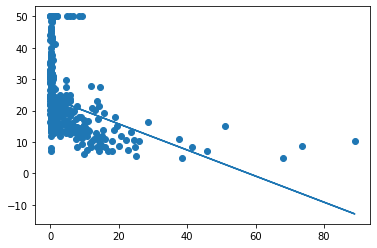

In [ ]:
import matplotlib.pyplot as plt

## target(실제값)과 crim 변수의 산점도
plt.scatter(crim,target,label='data')

## pred1(추정값)과 crim 변수의 선
plt.plot(crim,pred1,label = 'result')

plt.show()

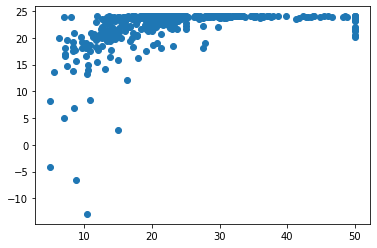

In [ ]:
## 실제값과 추정값의 산점도
plt.scatter(target,pred1)
plt.show()

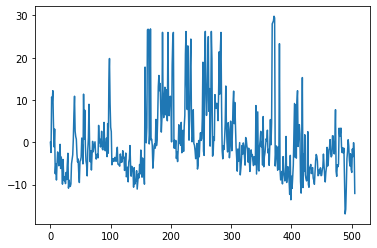

-3.693045869113121e-12

In [ ]:
## 잔차 확인 (차이가 확실히 존재, 변동성도 큼)
fitted_crim_model.resid.plot()
plt.show()

##잔차 합 계산 해보기
sum(fitted_crim_model.resid)

### `rm변수와 b변수도 단순선형회귀분석 ㄱㄱ`

In [ ]:
rm1 = sm.add_constant(rm,has_constant='add')
b1 = sm.add_constant(b,has_constant='add')

model2 = sm.OLS(target,rm1)
fitted_model2 = model2.fit()
model3 = sm.OLS(target,b1)
fitted_model3 = model3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
fitted_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.49e-74
Time:                        08:29:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     63.05
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.32e-14
Time:                        08:29:42   Log-Likelihood:                -1810.4
No. Observations:                 506   AIC:                             3625.
Df Residuals:                     504   BIC:                             3633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5510      1.557      6.775      0.000       7.491      13.611
B              0.0336      0.004      7.941      0.000       0.025       0.042
==============================================================================
Omnibus:                      103.788   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.336
Skew:                           1.177   Prob(JB):                     7.70e-42
Kurtosis:                       4.855   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
"""
두 변수 모두 p값이 매우 낮으므로 p값으로 
두 변수의 중요성(유의성) 순위 판단하기 힘듬
r-squared (설명력) 을 통해 비교
"""

pred2 = fitted_model2.predict(rm1)

pred3 = fitted_model3.predict(b1)

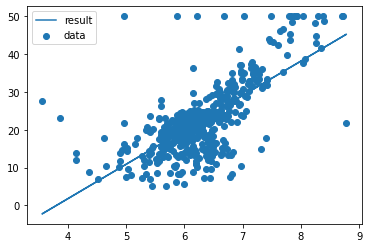

In [ ]:
plt.scatter(rm,target,label="data")
plt.plot(rm,pred2,label="result")
plt.legend()
plt.show()

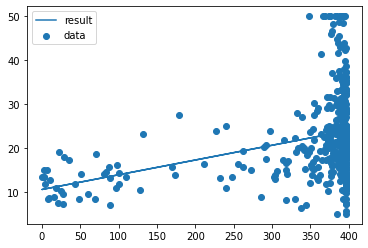

In [ ]:
plt.scatter(b,target,label="data")
plt.plot(b,pred3,label="result")
plt.legend()
plt.show()

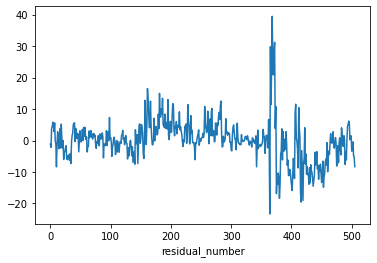

In [ ]:
fitted_model2.resid.plot()
plt.xlabel("residual_number")
plt.show()

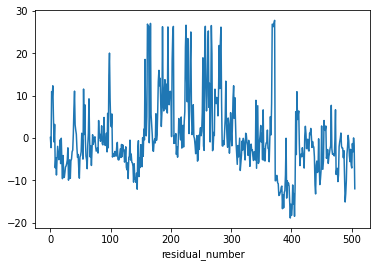

In [ ]:
fitted_model3.resid.plot()
plt.xlabel("residual_number")
plt.show()

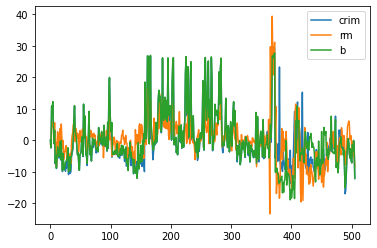

In [ ]:
##잔차도 비교

fitted_crim_model.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="b")
plt.legend()

In [ ]:
mult = boston[['CRIM','RM','B']]
target = boston['Target']

mult1 = sm.add_constant(mult,has_constant='add')

mult_model = sm.OLS(target,mult1)
fit_mult_model = mult_model.fit()

fit_mult_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           9.64e-92
Time:                        08:29:44   Log-Likelihood:                -1626.4
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     502   BIC:                             3278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4134      2.726    -12.993      0.000     -40.768     -30.058
CRIM          -0.1913      0.034     -5.548      0.000      -0.259      -0.124
RM             8.2809      0.393     21.079      0.000       7.509       9.053
B              0.0185      0.003      5.785      0.000       0.012       0.025
==============================================================================
Omnibus:                      206.300   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.221
Skew:                           1.633   Prob(JB):                    3.21e-300
Kurtosis:                      10.399   Cond. No.                     3.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b 구하기

In [ ]:
# 함수로 구하기

fit_mult_model.params

const   -35.413371
CRIM     -0.191317
RM        8.280916
B         0.018490
dtype: float64

In [ ]:
# 행렬 연산으로 구하기

from numpy import linalg
ba=linalg.inv(np.dot(mult1.T,mult1)) # (X'X)-1
np.dot(np.dot(ba,mult1.T),target) # (X'X)-1X'Y


array([-3.54133711e+01, -1.91316829e-01,  8.28091560e+00,  1.84902118e-02])

### 잔차도 비교

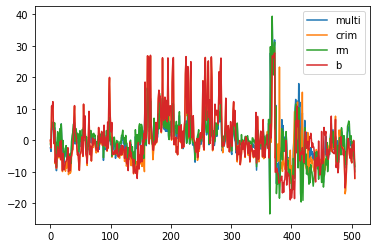

In [ ]:
pred4 = fit_mult_model.predict(mult1)
pred4

import matplotlib.pyplot as plt
fit_mult_model.resid.plot(label='multi')
fitted_crim_model.resid.plot(label='crim')
fitted_model2.resid.plot(label='rm')
fitted_model3.resid.plot(label='b')
plt.legend()
plt.show()

# git 연동

In [ ]:
'''
! git init

!git config user.name "pbottleh"
!git config user.email "bh15love@naver.com"

# add 로 git에 파일을 추가한다는 의미, .은 모든 파일 다 올린다는 뜻
! git add .

! git status

! git commit -m "first commit"

#연결고리 생성
!git remote add origin https://github.com/pbottleh/regression-analysis.git

#연결고리 확인
! git remote -v

#보내기
!git push origin master
'''

'\n! git init\n\n!git config user.name "pbottleh"\n!git config user.email "bh15love@naver.com"\n\n# add 로 git에 파일을 추가한다는 의미, .은 모든 파일 다 올린다는 뜻\n! git add .\n\n! git status\n\n! git commit -m "first commit"\n\n#연결고리 생성\n!git remote add origin https://github.com/pbottleh/regression-analysis.git\n\n#연결고리 확인\n! git remote -v\n\n#보내기\n!git push origin master\n'

# crim, rm, lstat, b, tax, age, zn, nox, indus 변수를 통한 다중선형회귀분석

In [ ]:
x_data = boston[["CRIM",'RM','LSTAT','B','AGE','ZN','NOX','INDUS']]
x_data

,CRIM,RM,LSTAT,B,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,54.2,0.0,0.458,2.18
...,...,...,...,...,...,...,...,...
501,0.06263,6.593,9.67,391.99,69.1,0.0,0.573,11.93
502,0.04527,6.120,9.08,396.90,76.7,0.0,0.573,11.93
503,0.06076,6.976,5.64,396.90,91.0,0.0,0.573,11.93
504,0.10959,6.794,6.48,393.45,89.3,0.0,0.573,11.93


In [ ]:
x_data1 = sm.add_constant(x_data,has_constant='add')
x_data1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CRIM,RM,LSTAT,B,AGE,ZN,NOX,INDUS
0,1.0,0.00632,6.575,4.98,396.90,65.2,18.0,0.538,2.31
1,1.0,0.02731,6.421,9.14,396.90,78.9,0.0,0.469,7.07
2,1.0,0.02729,7.185,4.03,392.83,61.1,0.0,0.469,7.07
3,1.0,0.03237,6.998,2.94,394.63,45.8,0.0,0.458,2.18
4,1.0,0.06905,7.147,5.33,396.90,54.2,0.0,0.458,2.18
...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,6.593,9.67,391.99,69.1,0.0,0.573,11.93
502,1.0,0.04527,6.120,9.08,396.90,76.7,0.0,0.573,11.93
503,1.0,0.06076,6.976,5.64,396.90,91.0,0.0,0.573,11.93
504,1.0,0.10959,6.794,6.48,393.45,89.3,0.0,0.573,11.93


In [ ]:
mult_model1 = sm.OLS(target,x_data1)
fit_mult_model1 = mult_model1.fit()

fit_mult_model1.summary()

#변수 3개일 떄와 설명력에 큰 차이가 존재하지 않음
#p값이 높게나온 변수 nox, indus

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          1.06e-110
Time:                        08:29:45   Log-Likelihood:                -1568.7
No. Observations:                 506   AIC:                             3155.
Df Residuals:                     497   BIC:                             3193.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7874      3.838     -2.029      0.043     -15.329      -0.246
CRIM          -0.0784      0.033     -2.356      0.019      -0.144      -0.013
RM             5.0663      0.461     10.999      0.000       4.161       5.971
LSTAT         -0.5725      0.058     -9.945      0.000      -0.686      -0.459
B              0.0101      0.003      3.329      0.001       0.004       0.016
AGE            0.0253      0.014      1.762      0.079      -0.003       0.053
ZN             0.0245      0.013      1.841      0.066      -0.002       0.051
NOX            1.5341      3.771      0.407      0.684      -5.874       8.943
INDUS         -0.0399      0.059     -0.674      0.501      -0.156       0.076
==============================================================================
Omnibus:                      174.536   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.410
Skew:                           1.545   Prob(JB):                    5.31e-145
Kurtosis:                       7.686   Cond. No.                     6.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 3변수만 있을때 회귀계수
fit_mult_model.params

const   -35.413371
CRIM     -0.191317
RM        8.280916
B         0.018490
dtype: float64

In [ ]:
#full모델 변수만 있을때 회귀계수
fit_mult_model1.params

'''
변수의 개수가 많아지면서 겹치는
변동성이 존재하기에
각 회귀계수의 절댓값이 줄어듬
'''

'\n변수의 개수가 많아지면서 겹치는\n변동성이 존재하기에\n각 회귀계수의 절댓값이 줄어듬\n'

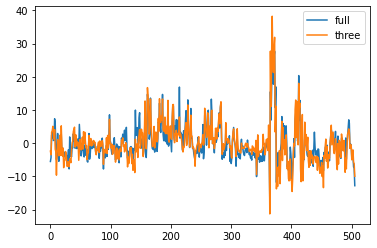

In [ ]:
import matplotlib.pyplot as plt

fit_mult_model1.resid.plot(label='full')
fit_mult_model.resid.plot(label='three')
plt.legend()
plt.show()



# 상관계수/산점도를 통해 다중공선성 확인

In [ ]:
#상관계수 확인

x_data.corr()

,CRIM,RM,LSTAT,B,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.273534,0.175520,-0.380051,-0.356977
AGE,0.352734,-0.240265,0.602339,-0.273534,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.644779,-0.533828,0.763651,1.000000


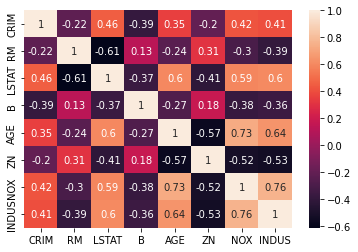

In [ ]:
# 상관계수 시각화 하기

import seaborn as sns
#cmap = sns.light_palette('darkgray' , as_cmap=True)  색깔 입힐때 사용, heatmap()함수에 cmap = cmap 파라미터 넣으면 됨
sns.heatmap(x_data.corr(),annot=True#,cmap = cmap
)
plt.show()

#nox , indus 는 여기서도 높은 상관계수값 가짐으로써 유의해야함.

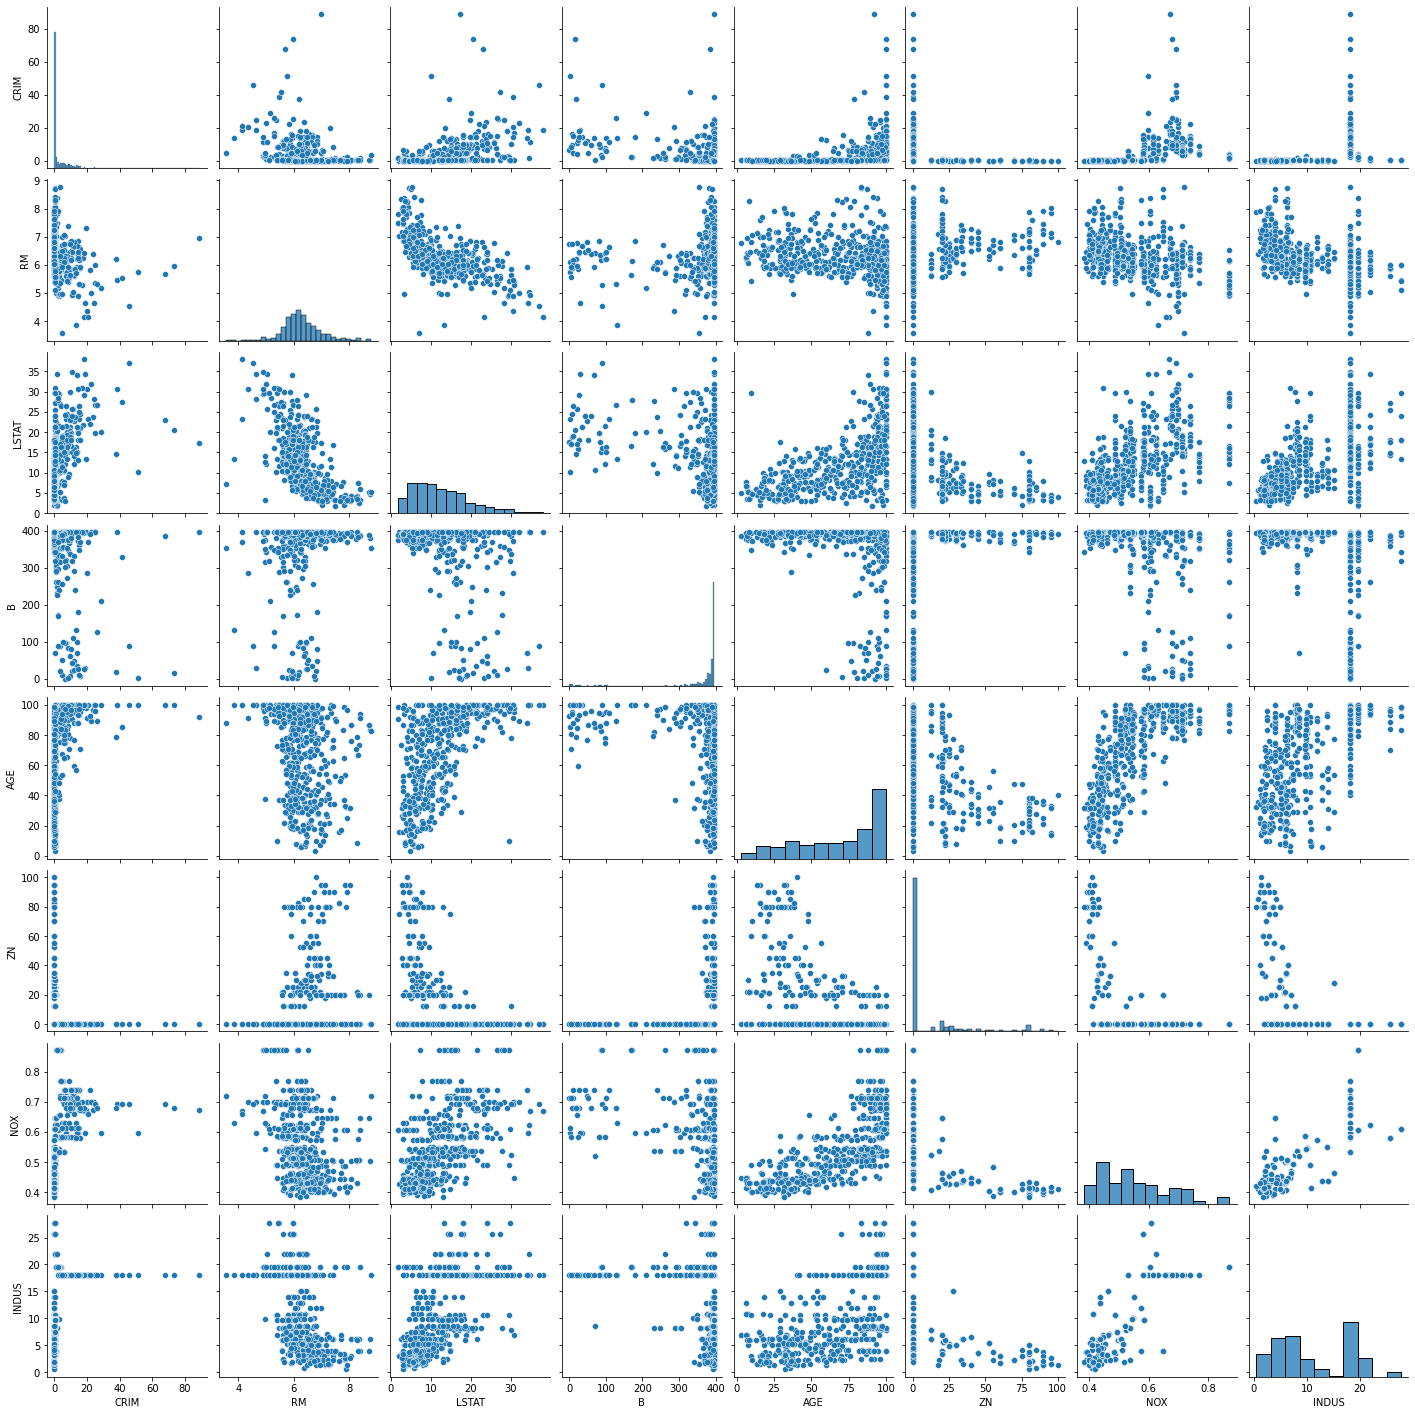

In [ ]:
# 변수별 산점도 시각화
sns.pairplot(x_data)
plt.show()

# VIF를 통한 다중공선성 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data.values,i) for i in range(x_data.shape[1])]
vif['Feature'] = x_data.columns
vif

,VIF Factor,Feature
0,1.653580,CRIM
1,45.551256,RM
2,8.747912,LSTAT
3,16.588435,B
4,18.377838,AGE
5,2.038685,ZN
6,68.091344,NOX
7,10.338926,INDUS


In [ ]:
# nox 변수 제거 후 다시 vif 계산

x_data2 = x_data.drop('NOX',axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data2.values,i) for i in range(x_data2.shape[1])]
vif['Feature'] = x_data2.columns
vif

,VIF Factor,Feature
0,1.643012,CRIM
1,26.703861,RM
2,7.893216,LSTAT
3,16.536511,B
4,16.333921,AGE
5,2.035352,ZN
6,7.731868,INDUS


In [ ]:
# 많이 줄어들었지만, rm까지 제거 후 다시 vif 계산

x_data3 = x_data2.drop('RM',axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data3.values,i) for i in range(x_data3.shape[1])]
vif['Feature'] = x_data3.columns
vif

,VIF Factor,Feature
0,1.632526,CRIM
1,7.792738,LSTAT
2,6.930725,B
3,13.259585,AGE
4,1.651789,ZN
5,7.578961,INDUS
